In [1]:
import pandas as pd
import numpy  as np 
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime



Noise: 152 points
Cluster 0: 12 points
Cluster 1: 5 points
Cluster 2: 9 points
Cluster 3: 12 points
Cluster 4: 5 points
Cluster 5: 4 points
Cluster 6: 20 points
Cluster 7: 9 points
Cluster 8: 10 points
Cluster 9: 5 points
Cluster 10: 4 points
Cluster 11: 4 points
Cluster 12: 13 points
Cluster 13: 7 points
Cluster 14: 10 points
Cluster 15: 4 points
Cluster 16: 5 points
Cluster 17: 18 points
Cluster 18: 8 points
Cluster 19: 7 points
Cluster 20: 14 points
Cluster 21: 4 points
Cluster 22: 25 points
Cluster 23: 10 points
Cluster 24: 13 points
Cluster 25: 90 points
Cluster 26: 4 points
Cluster 27: 5 points
Cluster 28: 41 points
Cluster 29: 51 points
Cluster 30: 61 points
Cluster 31: 20 points
Silhouette Score: 0.005017305967496258
Davies-Bouldin Index: 1.9128379141637317


C:\Users\User\AppData\Local\Temp\ipykernel_15520\1137508525.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


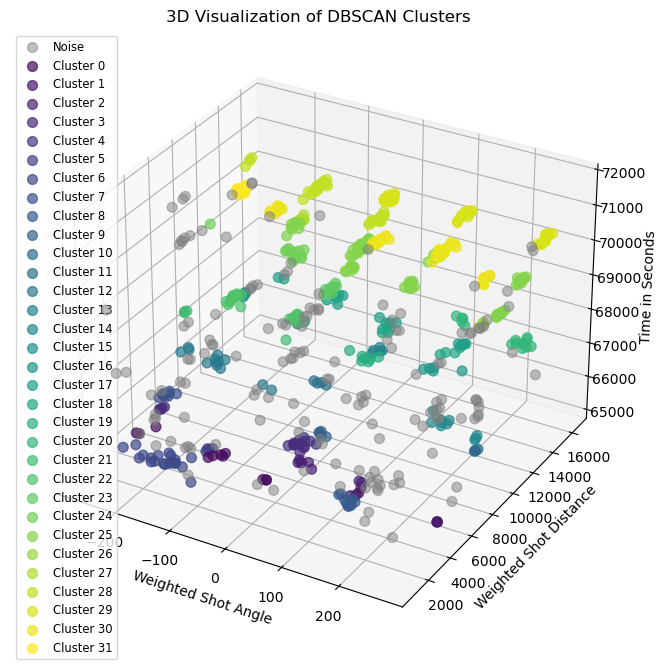

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# קריאת הדאטה הלא מנורמל
df = pd.read_csv('clean_df.csv')  # נתיב לקובץ הנתונים הלא מנורמלים

# שקלול המיקום לעומת הזמן (לדוגמה, משקל פי 3 למיקום)
df['Weighted_Angle'] = df['ShotAngle'] * 1.0
df['Weighted_Distance'] = df['ShotDistance'] * 1.0
df['Weighted_Time'] = df['TimeInSeconds'] * 0.8

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time']]

# ביצוע קלאסטרינג עם DBSCAN
dbscan = DBSCAN(eps=250, min_samples=4)  # ערכים לדוגמה, ניתן לשנות
labels = dbscan.fit_predict(weighted_data)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# הדפסת מספר הנקודות בכל קלאסטר כולל רעש
unique_clusters, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    if cluster == -1:
        print(f"Noise: {count} points")
    else:
        print(f"Cluster {cluster}: {count} points")

# חישוב המדדים Silhouette Score ו-Davies-Bouldin Index
if len(set(labels)) > 1 and len(set(labels)) - (1 if -1 in labels else 0) > 1:
    silhouette = silhouette_score(weighted_data, labels)
    davies_bouldin = davies_bouldin_score(weighted_data, labels)
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
else:
    print("לא ניתן לחשב את המדדים מאחר ויש רק קלאסטר אחד תקין או שכל הנקודות מסווגות כרעש.")

# ויזואליזציה תלת-ממדית של הקלאסטרים
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# הגדרת צבעים לכל קלאסטר
unique_clusters = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    if cluster == -1:
        # נקודות רעש בצבע אפור
        ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
                   c='grey', label='Noise', s=50, alpha=0.5)
    else:
        # קלסטרים בצבעים שונים
        ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
                   c=np.array([colors(idx)]), label=f'Cluster {cluster}', s=50, alpha=0.7)

# הגדרות גרף
ax.set_title('3D Visualization of DBSCAN Clusters')
ax.set_xlabel('Weighted Shot Angle')
ax.set_ylabel('Weighted Shot Distance')
ax.set_zlabel('Time in Seconds')
plt.legend(loc='best', fontsize='small')
plt.grid(True)

# הצגת הגרף
plt.show()


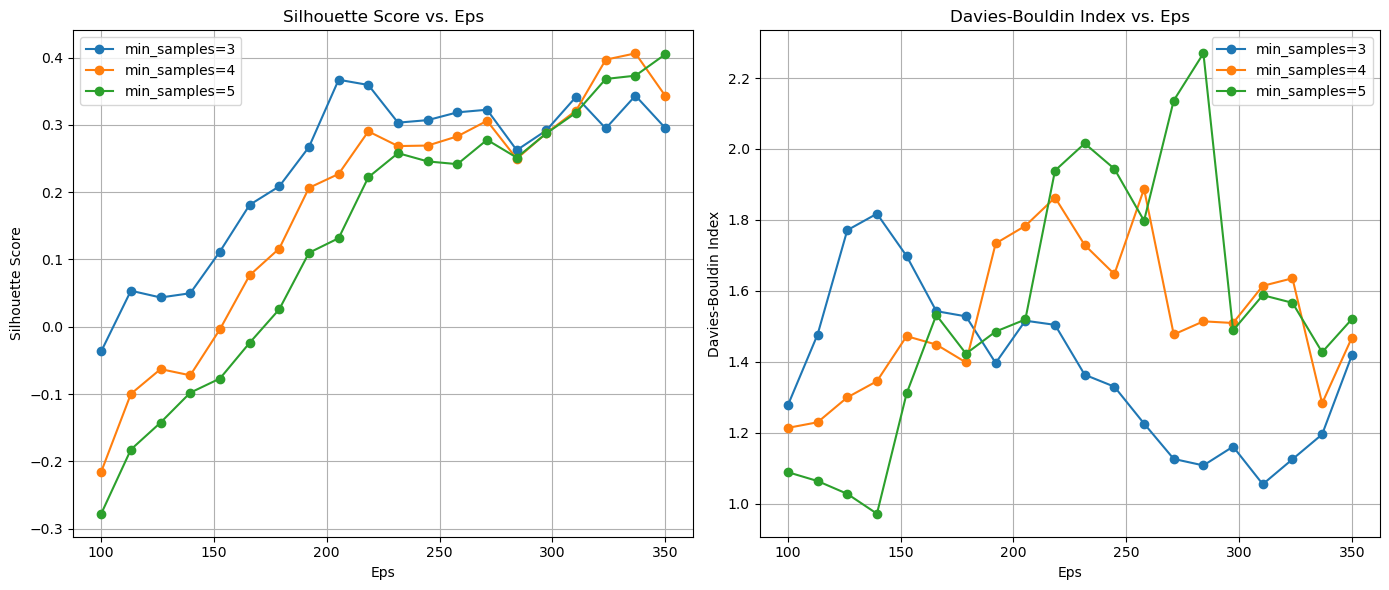

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


# שקלול המיקום לעומת הזמן (לדוגמה, משקל פי 2 למיקום)
df['Weighted_Angle'] = df['ShotAngle'] * 1.5
df['Weighted_Distance'] = df['ShotDistance'] * 1.5
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time']]

# טווחי הערכים ל-eps ול-min_samples
eps_values = np.linspace(100, 350, 20)
min_samples_values = range(3, 6)

# שמירת תוצאות
results = []

# הרצת DBSCAN עבור כל שילוב של eps ו-min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(weighted_data)
        
        # בדיקה אם יש יותר מקלאסטר אחד תקין
        if len(set(labels)) > 1 and len(set(labels)) - (1 if -1 in labels else 0) > 1:
            silhouette = silhouette_score(weighted_data, labels)
            davies_bouldin = davies_bouldin_score(weighted_data, labels)
        else:
            silhouette = -1  # ערך שמצביע על קלאסטרינג לא תקין
            davies_bouldin = float('inf')  # אינסוף מצביע על קלאסטרינג לא תקין

        # שמירת התוצאות
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin
        })

# המרת התוצאות לדאטה פריים לניתוח וויזואליזציה
results_df = pd.DataFrame(results)

# ויזואליזציה של Silhouette Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette'], marker='o', linestyle='-', label=f'min_samples={min_samples}')
plt.title('Silhouette Score vs. Eps')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

# ויזואליזציה של Davies-Bouldin Index
plt.subplot(1, 2, 2)
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['davies_bouldin'], marker='o', linestyle='-', label=f'min_samples={min_samples}')
plt.title('Davies-Bouldin Index vs. Eps')
plt.xlabel('Eps')
plt.ylabel('Davies-Bouldin Index')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Noise: 44 points
Cluster 0: 65 points
Cluster 1: 37 points
Cluster 2: 5 points
Cluster 3: 9 points
Cluster 4: 5 points
Cluster 5: 49 points
Cluster 6: 5 points
Cluster 7: 64 points
Cluster 8: 5 points
Cluster 9: 5 points
Cluster 10: 7 points
Cluster 11: 8 points
Cluster 12: 8 points
Cluster 13: 27 points
Cluster 14: 11 points
Cluster 15: 206 points
Cluster 16: 11 points
Cluster 17: 90 points
Silhouette Score: 0.28736657051630804
Davies-Bouldin Index: 1.4884832803906165


C:\Users\User\AppData\Local\Temp\ipykernel_18144\3993240904.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


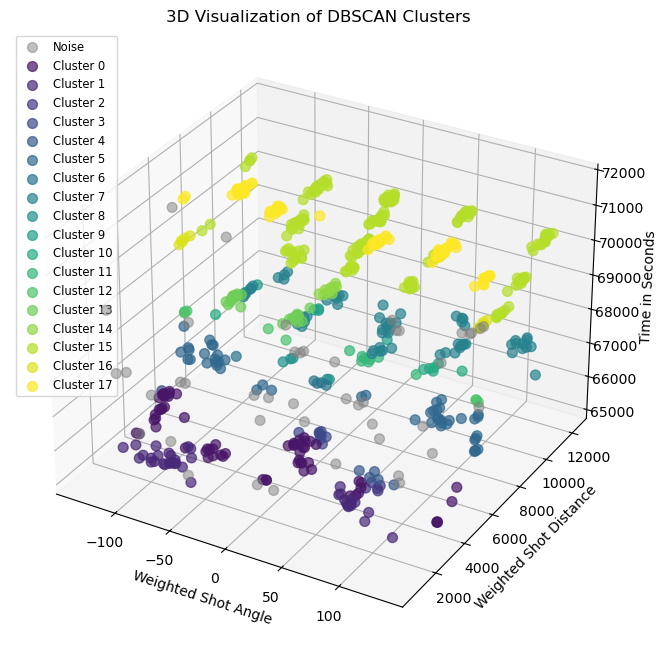

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# קריאת הדאטה הלא מנורמל
df = pd.read_csv('clean_df.csv')  # נתיב לקובץ הנתונים הלא מנורמלים

# שקלול המיקום לעומת הזמן (לדוגמה, משקל פי 3 למיקום)
df['Weighted_Angle'] = df['ShotAngle'] * 1.5
df['Weighted_Distance'] = df['ShotDistance'] * 1.5
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time']]

# ביצוע קלאסטרינג עם DBSCAN
dbscan = DBSCAN(eps=300, min_samples=5)  # ערכים לדוגמה, ניתן לשנות
labels = dbscan.fit_predict(weighted_data)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# הדפסת מספר הנקודות בכל קלאסטר כולל רעש
unique_clusters, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    if cluster == -1:
        print(f"Noise: {count} points")
    else:
        print(f"Cluster {cluster}: {count} points")

# חישוב המדדים Silhouette Score ו-Davies-Bouldin Index
if len(set(labels)) > 1 and len(set(labels)) - (1 if -1 in labels else 0) > 1:
    silhouette = silhouette_score(weighted_data, labels)
    davies_bouldin = davies_bouldin_score(weighted_data, labels)
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
else:
    print("לא ניתן לחשב את המדדים מאחר ויש רק קלאסטר אחד תקין או שכל הנקודות מסווגות כרעש.")

# ויזואליזציה תלת-ממדית של הקלאסטרים
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# הגדרת צבעים לכל קלאסטר
unique_clusters = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    if cluster == -1:
        # נקודות רעש בצבע אפור
        ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
                   c='grey', label='Noise', s=50, alpha=0.5)
    else:
        # קלסטרים בצבעים שונים
        ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
                   c=np.array([colors(idx)]), label=f'Cluster {cluster}', s=50, alpha=0.7)

# הגדרות גרף
ax.set_title('3D Visualization of DBSCAN Clusters')
ax.set_xlabel('Weighted Shot Angle')
ax.set_ylabel('Weighted Shot Distance')
ax.set_zlabel('Time in Seconds')
plt.legend(loc='best', fontsize='small')
plt.grid(True)

# הצגת הגרף
plt.show()


In [3]:
d())





SyntaxError: unmatched ')' (4174297693.py, line 1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# פונקציה לציור מגרש כדורסל בסיבוב של 90 מעלות ובהתאמת גודל
def draw_scaled_rotated_court(ax=None, color='black', lw=2, scale=16):
    if ax is None:
        ax = plt.gca()

    # התאמת גודל המגרש לפי הסקאלה
    court_elements = [
        patches.Rectangle((-47.5 * scale, -250 * scale), 470 * scale, 500 * scale, linewidth=lw, color=color, fill=False),  # half court
        patches.Circle((0, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # הכדור המרכזי
        patches.Arc((0, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color),  # חצי מעגל המרכז
        patches.Rectangle((-47.5 * scale, -80 * scale), 190 * scale, 160 * scale, linewidth=lw, color=color, fill=False),  # אזור העונשין
        patches.Circle((142.5 * scale, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # עיגול העונשין
        patches.Arc((142.5 * scale, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color),  # חצי מעגל העונשין
        patches.Arc((6000, 0), 475 * scale, 475 * scale, theta1=248, theta2=248, linewidth=lw, color=color),  # קו השלוש
    ]

    # הוספת כל חלק למגרש
    for element in court_elements:
        ax.add_patch(element)

# המרה של מרחק וזווית למיקומי X ו-Y על המגרש
df['PlotX'] = df['ShotDistance'] * np.cos(np.radians(df['ShotAngle']))
df['PlotY'] = df['ShotDistance'] * np.sin(np.radians(df['ShotAngle']))

# יצירת גרף פיזור למיקום הזריקות על מגרש הכדורסל לפי המרחק והזווית
plt.figure(figsize=(12, 10))
ax = plt.gca()

# ציור המגרש בסיבוב של 90 מעלות ובהתאמת גודל לסקאלה
draw_scaled_rotated_court(ax, scale=10)  # שינוי הערך של scale בהתאם לסקאלה שלך

# הגדרת צבעים לקלסטרים
unique_clusters = sorted(df['Cluster'].unique())  # מיון הערכים הייחודיים של קלסטרים
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

# ציור הזריקות לפי קלסטרים (מיקום לפי מרחק וזווית)
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    if cluster == -1:
        # רעש בצבע אפור
        ax.scatter(cluster_data['PlotX'], cluster_data['PlotY'], c='grey', label='Noise', s=50, alpha=0.5)
    else:
        # קלסטרים בצבעים שונים
        scatter = ax.scatter(
            cluster_data['PlotX'], cluster_data['PlotY'], 
            c=np.array([colors(idx)]),  # שימוש באינדקס של הקלסטר כדי לצבוע את הנקודות
            s=50, alpha=0.7, 
            label=f'Cluster {cluster}'
        )

# הגדרות גרף מותאמות לסקאלה החדשה
ax.set_xlim(-500, 8000)
ax.set_ylim(-10000, 10000)
ax.set_title('Shot Clusters by Calculated Position on Basketball Court')
ax.set_xlabel('Position X (Calculated from Distance and Angle)')
ax.set_ylabel('Position Y (Calculated from Distance and Angle)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.5)

# הצגת הגרף
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# מציאת מרחקי k-שכנים
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(weighted_data)
distances, indices = neighbors_fit.kneighbors(weighted_data)

# סידור המרחקים לצורך תצוגה
distances = np.sort(distances[:, 4], axis=0)  # שימוש בשכן החמישי כי min_samples=5

# גרף להצגת המרחקים ולזיהוי ה-"מרפק"
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-Distance Graph for Determining eps')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# הכנה של הנתונים עם המשקלות כפי שנעשה קודם
scaler = StandardScaler()
df[['Norm_ShotAngle', 'Norm_ShotDistance', 'Norm_TimeInSeconds']] = scaler.fit_transform(
    df[['ShotAngle', 'ShotDistance', 'TimeInSeconds']]
)

df['Weighted_Angle'] = df['Norm_ShotAngle'] * 2
df['Weighted_Distance'] = df['Norm_ShotDistance'] * 2
df['Weighted_Time'] = df['Norm_TimeInSeconds'] * 1

weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time']]

# טווח הערכים של eps
eps_values = np.linspace(0.4, 0.65, 20)
silhouette_scores = []
davies_bouldin_indices = []

# הרצת DBSCAN עבור כל ערך של eps וחישוב המדדים
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(weighted_data)
    
    # בדיקה אם יש יותר מקלאסטר אחד תקין (כלומר, לא רק רעש)
    if len(set(labels)) > 1 and len(set(labels)) - (1 if -1 in labels else 0) > 1:
        silhouette = silhouette_score(weighted_data, labels)
        davies_bouldin = davies_bouldin_score(weighted_data, labels)
    else:
        silhouette = -1  # ערך שמצביע על קלאסטרינג לא תקין
        davies_bouldin = float('inf')  # אינסוף מצביע על קלאסטרינג לא תקין
    
    silhouette_scores.append(silhouette)
    davies_bouldin_indices.append(davies_bouldin)

# יצירת גרף להצגת המדדים
plt.figure(figsize=(14, 6))

# גרף Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Eps')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.grid(True)

# גרף Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(eps_values, davies_bouldin_indices, marker='o', linestyle='-')
plt.title('Davies-Bouldin Index vs. Eps')
plt.xlabel('Eps')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# פונקציה לציור מגרש כדורסל בסיבוב של 90 מעלות ובהתאמת גודל
def draw_scaled_rotated_court(ax=None, color='black', lw=2, scale=16):
    if ax is None:
        ax = plt.gca()

    # התאמת גודל המגרש לפי הסקאלה
    court_elements = [
        patches.Rectangle((-47.5 * scale, -250 * scale), 470 * scale, 500 * scale, linewidth=lw, color=color, fill=False),  # half court
        patches.Circle((0, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # הכדור המרכזי
        patches.Arc((0, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל המרכז
        patches.Rectangle((-47.5 * scale, -80 * scale), 190 * scale, 160 * scale, linewidth=lw, color=color, fill=False),  # אזור העונשין
        patches.Circle((142.5 * scale, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # עיגול העונשין
        patches.Arc((142.5 * scale, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל העונשין
        patches.Arc((6000, 0), 475 * scale, 475 * scale, theta1=68, theta2=112, linewidth=lw, color=color, fill=False),  # קו השלוש
    ]

    # הוספת כל חלק למגרש
    for element in court_elements:
        ax.add_patch(element)

# המרה של מרחק וזווית למיקומי X ו-Y על המגרש
df['PlotX'] = df['ShotDistance'] * np.cos(np.radians(df['ShotAngle']))
df['PlotY'] = df['ShotDistance'] * np.sin(np.radians(df['ShotAngle']))

# נורמליזציה של הנתונים ושקלול התכונות
scaler = StandardScaler()
df[['Norm_ShotAngle', 'Norm_ShotDistance', 'Norm_TimeInSeconds']] = scaler.fit_transform(
    df[['ShotAngle', 'ShotDistance', 'TimeInSeconds']]
)

# החלת המשקלות על הזווית והמרחק לעומת הזמן
df['Weighted_Angle'] = df['Norm_ShotAngle'] * 2
df['Weighted_Distance'] = df['Norm_ShotDistance'] * 2
df['Weighted_Time'] = df['Norm_TimeInSeconds'] * 1

# יצירת מערך הנתונים המשוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time']]

# שימוש ב-DBSCAN עם פרמטרים מתאימים
dbscan = DBSCAN(eps=0.43, min_samples=4)
labels_dbscan = dbscan.fit_predict(weighted_data)

# בדיקה האם יש לפחות 5 קלאסטרים
num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Number of clusters found: {num_clusters}")

# חישוב Silhouette Score ו-Davies-Bouldin Index
if num_clusters >= 2:  # המדדים ניתנים לחישוב רק אם יש לפחות שני קלאסטרים
    silhouette_dbscan = silhouette_score(weighted_data, labels_dbscan)
    davies_bouldin_dbscan = davies_bouldin_score(weighted_data, labels_dbscan)

    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
    print(f"Davies-Bouldin Index (DBSCAN): {davies_bouldin_dbscan}")

# הוספת הקלאסטרים ל-DataFrame
df['Cluster'] = labels_dbscan

# יצירת גרף פיזור למיקום הזריקות על מגרש הכדורסל לפי המרחק והזווית
plt.figure(figsize=(12, 10))
ax = plt.gca()

# ציור המגרש בסיבוב של 90 מעלות ובהתאמת גודל לסקאלה
draw_scaled_rotated_court(ax, scale=10)  # שינוי הערך של scale בהתאם לסקאלה שלך

# הגדרת צבעים לקלסטרים
unique_clusters = sorted(df['Cluster'].unique())  # מיון הערכים הייחודיים של קלסטרים
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

# ציור הזריקות לפי קלסטרים (מיקום לפי מרחק וזווית)
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    if cluster == -1:
        # רעש בצבע אפור
        ax.scatter(cluster_data['PlotX'], cluster_data['PlotY'], c='grey', label='Noise', s=50, alpha=0.5)
    else:
        # קלסטרים בצבעים שונים
        scatter = ax.scatter(
            cluster_data['PlotX'], cluster_data['PlotY'], 
            c=np.array([colors(idx)]),  # שימוש באינדקס של הקלסטר כדי לצבוע את הנקודות
            s=50, alpha=0.7, 
            label=f'Cluster {cluster}'
        )

# הגדרות גרף מותאמות לסקאלה החדשה
ax.set_xlim(-500, 8000)
ax.set_ylim(-10000, 10000)
ax.set_title('Shot Clusters by Calculated Position on Basketball Court')
ax.set_xlabel('Position X (Calculated from Distance and Angle)')
ax.set_ylabel('Position Y (Calculated from Distance and Angle)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.5)

# הצגת הגרף
plt.show()
labels_dbscan = dbscan.fit_predict(weighted_data)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels_dbscan

# מציאת מספר הקלאסטרים (ללא רעש)
unique_clusters = np.unique(labels_dbscan)
unique_clusters = unique_clusters[unique_clusters != -1]  # הסרת רעש מהרשימה

# הדפסת מספר הנקודות בכל קלאסטר
for cluster in unique_clusters:
    num_points = np.sum(labels_dbscan == cluster)
    print(f"Cluster {cluster}: {num_points} points")

# הדפסת מספר הנקודות ברעש (אם יש)
num_noise = np.sum(labels_dbscan == -1)
print(f"Noise: {num_noise} points")
